In [1]:
## Import Required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv(r'ED_cleandata.csv')
df

,NAME,RATING,ADDRESS,CITY,DISHES,APPROX_PRICE,DISCOUNTS
0,Bella Aroma,4.6,Crowne Plaza,Ahmedabad,Cafe.,700,55
1,South Leaf - The Food Chain,4.4,Prahlad Nagar,Ahmedabad,South Indian.,900,40
2,Essence,4.5,Crowne Plaza,Ahmedabad,"Indian, North Indian.",2000,45
3,The Chocolate Room,5.0,Prahlad Nagar,Ahmedabad,Bakery.,500,60
4,Sphere Lounge,4.2,Hotel Ramada,Ahmedabad,"Indian, Continental.",900,35
...,...,...,...,...,...,...,...
670,Kanak,4.5,Trident Hyderabad,Hyderabad,Indian.,4500,50
671,Connect,1.0,Jubilee Hills,Hyderabad,Multicuisine.,1200,40
672,The Library Bar,4.0,The Leela Hyderabad,Hyderabad,"Finger Food, Cocktail Menu.",3500,25
673,Solcito,4.0,The Leela Hyderabad,Hyderabad,Multicuisine.,5000,25


In [3]:
## check the shape of the dataframe
df.shape

(675, 7)

### Observation-
- There are 675 rows and 7 columns in this dataframe

In [4]:
## Check the all information about this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          675 non-null    object 
 1   RATING        675 non-null    float64
 2   ADDRESS       675 non-null    object 
 3   CITY          675 non-null    object 
 4   DISHES        675 non-null    object 
 5   APPROX_PRICE  675 non-null    int64  
 6   DISCOUNTS     675 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 37.0+ KB


### Observation-
- There are 1 float, 2 int and 4 objects

In [5]:
df.describe()

,RATING,APPROX_PRICE,DISCOUNTS
count,675.000000,675.000000,675.000000
mean,4.226963,1668.041481,42.014815
std,0.660152,874.178126,13.673267
min,1.000000,300.000000,25.000000
25%,4.000000,1000.000000,35.000000
50%,4.300000,1500.000000,40.000000
75%,4.600000,2000.000000,50.000000
max,5.000000,6000.000000,80.000000


In [6]:
df.describe(include = "object")

,NAME,ADDRESS,CITY,DISHES
count,675,675,675,675
unique,657,240,5,162
top,one8 Commune,Bodakdev,Ahmedabad,Multicuisine.
freq,3,39,135,275


In [7]:
### Checking for duplicates
df.duplicated().sum()

0

#### Observation-
- There are no duplicates

In [8]:
#### Checking for null values
df.isnull().sum()

NAME            0
RATING          0
ADDRESS         0
CITY            0
DISHES          0
APPROX_PRICE    0
DISCOUNTS       0
dtype: int64

#### Observation-
- There are no null values

### Number of unique values in each columns

In [9]:
df.nunique()

NAME            657
RATING           30
ADDRESS         240
CITY              5
DISHES          162
APPROX_PRICE     48
DISCOUNTS        11
dtype: int64

In [10]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [11]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [12]:
discrete_univariate_analysis(discrete_df)

********** NAME **********
count                                                    675
nunique                                                  657
unique     [Bella Aroma, South Leaf - The Food Chain, Ess...
Name: NAME, dtype: object
Value Counts: 
 NAME
one8 Commune                    3
Punjab Grill                    3
Mirage                          3
The Market                      2
Barbeque Nation                 2
                               ..
Aroma Street                    1
Lord Of The Drinks              1
Global Coffee House & Eatery    1
OKO                             1
The Foodstories Cafe            1
Name: count, Length: 657, dtype: int64

********** ADDRESS **********
count                                                    675
nunique                                                  240
unique     [Crowne Plaza, Prahlad Nagar, Hotel Ramada, Sa...
Name: ADDRESS, dtype: object
Value Counts: 
 ADDRESS
Bodakdev                       39
Banjara Hills                

In [13]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

numerical_univariate_analysis(numerical_df)

********** RATING **********
min       1.000000
max       5.000000
mean      4.226963
median    4.300000
std       0.660152
Name: RATING, dtype: float64

********** APPROX_PRICE **********
min        300.000000
max       6000.000000
mean      1668.041481
median    1500.000000
std        874.178126
Name: APPROX_PRICE, dtype: float64

********** DISCOUNTS **********
min       25.000000
max       80.000000
mean      42.014815
median    40.000000
std       13.673267
Name: DISCOUNTS, dtype: float64



### 1. Univariate Analysis

### Distribution of Restaurant Ratings

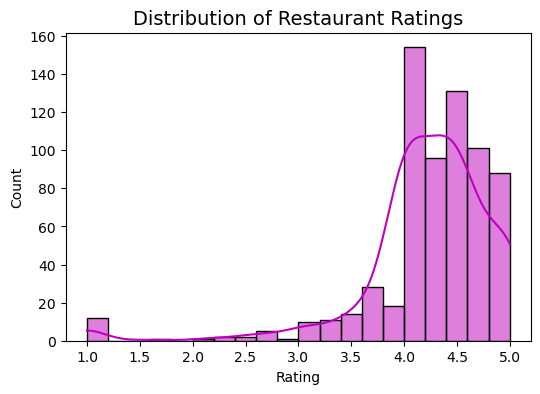

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df["RATING"], bins=20, kde=True, color="m", edgecolor="black")
plt.title("Distribution of Restaurant Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("Restaurant Rating.png",dpi = 400, bbox_inches = "tight")
plt.show()

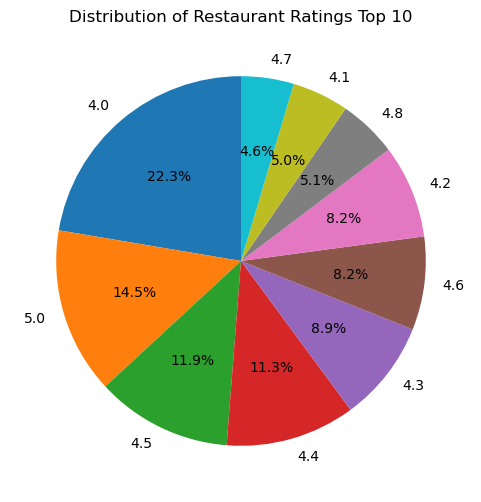

In [33]:
rating_counts = df["RATING"].value_counts().head(10)

plt.figure(figsize=(6,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Restaurant Ratings Top 10")
plt.savefig("Pie chart of restaurant ratings1.png",dpi = 400, bbox_inches = "tight")
plt.show()

#### Observations-
- The ratings range in the dataset is roughly from 3.0 to 5.0.
- Most restaurants are clustered between 4.0 and 4.5
- Very few restaurants fall below 3.0, meaning poorly rated restaurants are rare.

### 2) Approximate Prices Distribution

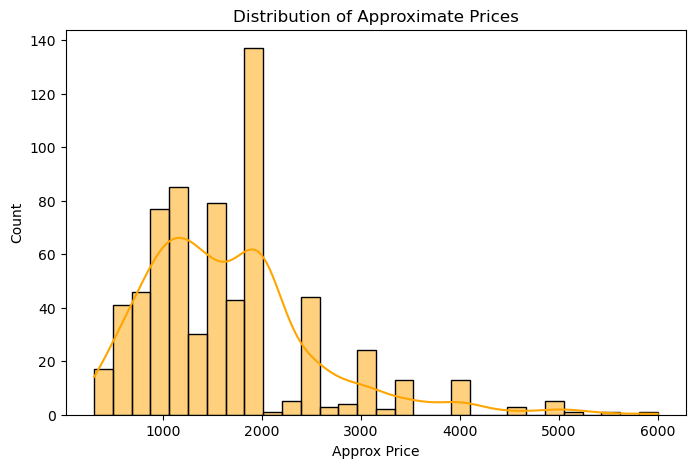

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["APPROX_PRICE"], bins=30, kde=True, color="orange", edgecolor="black")
plt.title("Distribution of Approximate Prices")
plt.xlabel("Approx Price")
plt.ylabel("Count")
plt.show()

#### Observation-
- Most restaurants fall into the lower-to-mid price range.
- A few restaurants have very high prices, which act as outliers and pull the mean upward.
- This indicates the dataset is dominated by affordable and mid-range dining options, with only a handful of premium restaurants

### 3) What is the Distribution of Discounts

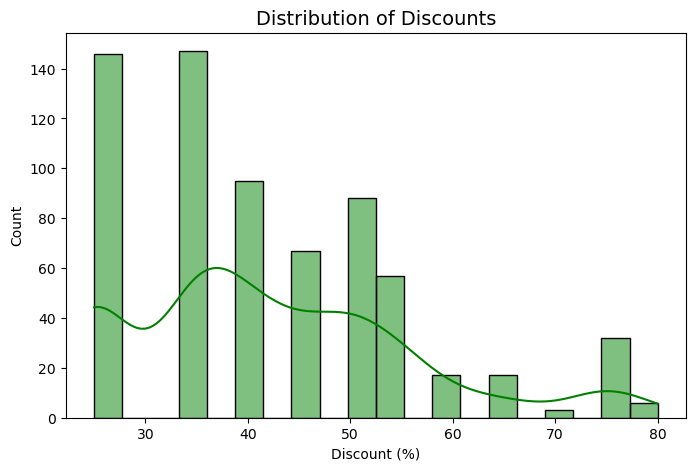

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["DISCOUNTS"], bins=20, kde=True, color="green", edgecolor="black")
plt.title("Distribution of Discounts", fontsize=14)
plt.xlabel("Discount (%)")
plt.ylabel("Count")
plt.savefig("Distribution of Discounts.png",dpi = 400, bbox_inches = "tight")
plt.show()

#### Observations-
- Most restaurants offer low to moderate discounts (e.g., under 30%).
- This suggests that discounts are not uniformly applied across restaurants; they are likely used more in competitive areas or for premium outlets

### 4) What are the Most Common Dishes Offered

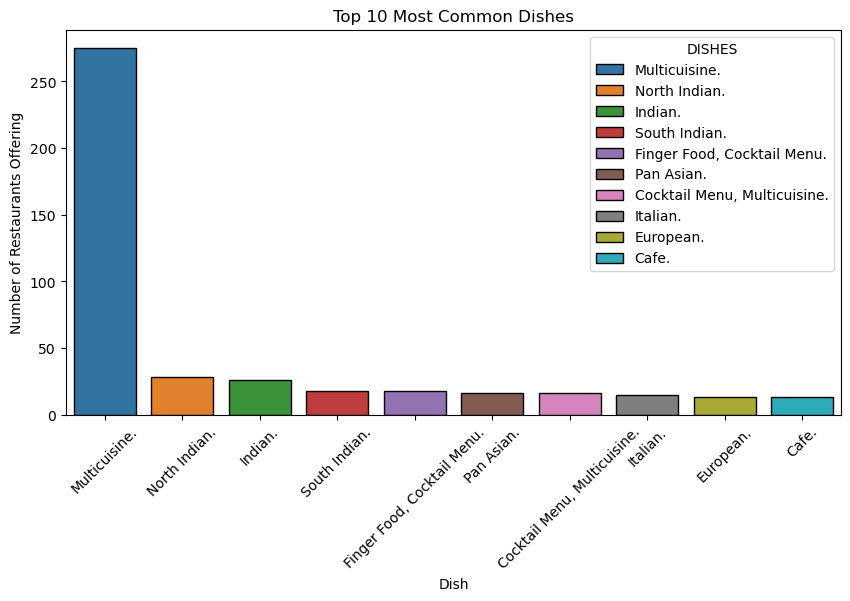

In [18]:
dish_counts = df["DISHES"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=dish_counts.head(10).index, y=dish_counts.head(10).values, hue =dish_counts.head(10).index, legend = True , edgecolor="black")
plt.title("Top 10 Most Common Dishes")
plt.ylabel("Number of Restaurants Offering")
plt.xlabel("Dish")
plt.xticks(rotation=45)
plt.savefig("Top 10 Most Common Dish.png",dpi = 400, bbox_inches = "tight")
plt.show()

### Conclusion-
- By counting occurrences of dishes, we can identify the top trending menu items.
- This shows the popular food preferences among customers.

### 5) Which Restaurant Chains Are The Most Popular

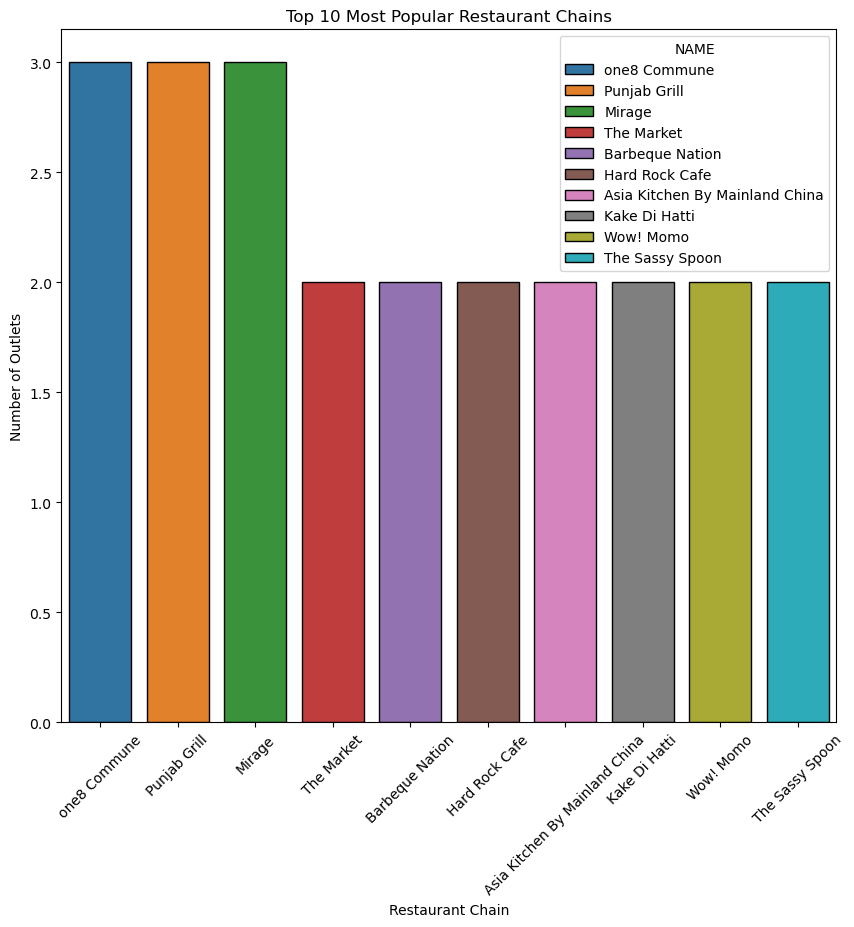

In [19]:
chain_counts = df["NAME"].value_counts()

plt.figure(figsize=(10,9))
sns.barplot(x=chain_counts.head(10).index, y=chain_counts.head(10).values, hue =chain_counts.head(10).index, legend = True ,edgecolor='black')
plt.title("Top 10 Most Popular Restaurant Chains")
plt.ylabel("Number of Outlets")
plt.xlabel("Restaurant Chain")
plt.savefig("Top 10 Most Popular Restaurant Chains.png",dpi = 400, bbox_inches = "tight")
plt.xticks(rotation=45)
plt.show()

## Top 10 Highest-Rated Restaurants

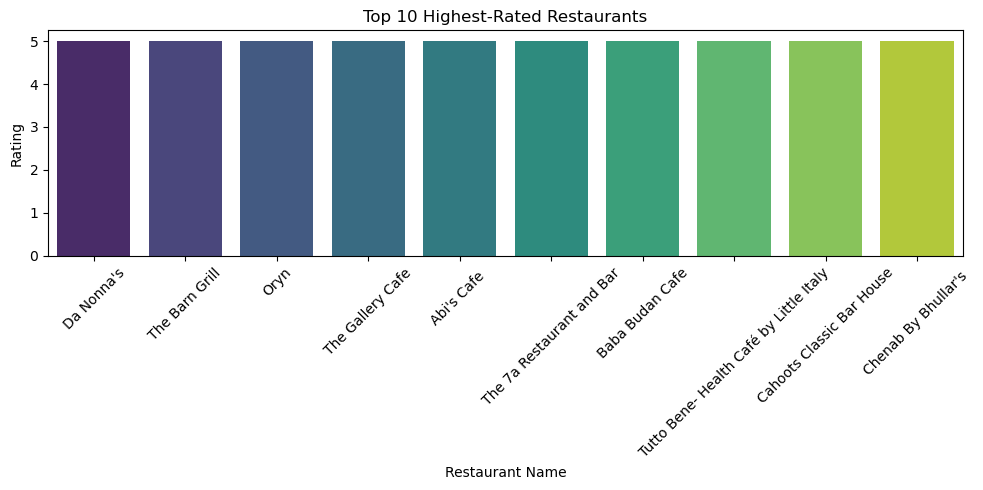

In [20]:
top_rated = df.sort_values("RATING", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_rated, x="NAME",  y="RATING",  palette="viridis")

plt.title("Top 10 Highest-Rated Restaurants")
plt.xlabel("Restaurant Name")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.savefig("Top 10 High Rated Restarants.png",dpi = 400, bbox_inches = "tight")
plt.tight_layout()
plt.show()

## Bivariate Analysis

### 1) Is There a Relationship Between Price and Rating

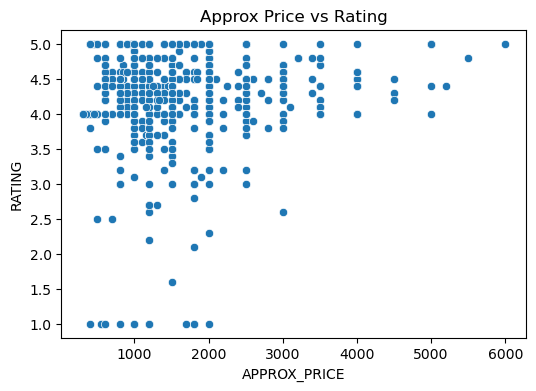

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='APPROX_PRICE', y='RATING', data=df)
plt.title("Approx Price vs Rating")
plt.savefig("Price and Rating.png",dpi = 400, bbox_inches = "tight")
plt.show()

#### Observations-
- Higher price does not always mean higher rating.
- mid-range restaurants often have better reviews

### 2) Do Higher Discounts Attract Better Ratings 

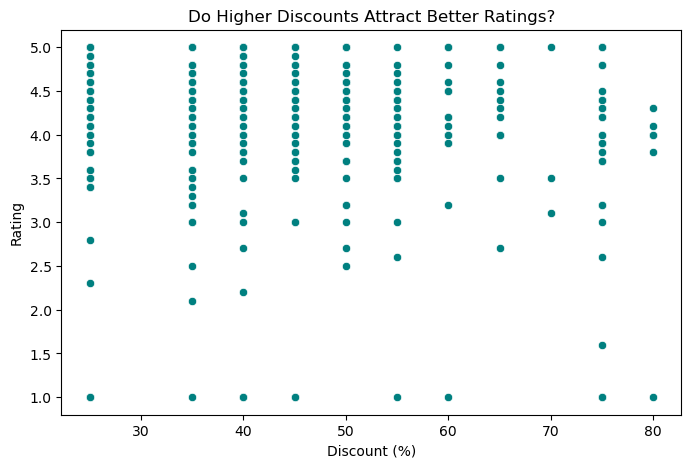

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="DISCOUNTS", y="RATING",color="teal")
plt.title("Do Higher Discounts Attract Better Ratings?")
plt.xlabel("Discount (%)")
plt.ylabel("Rating")
plt.show()

#### Observations-
- Ratings are usually clustered around 3.5–4.5 regardless of discount size.
- Correlation will likely be close to 0, meaning discounts don’t strongly affect customer ratings.

### 3) How Does Average Price Vary Across Cities

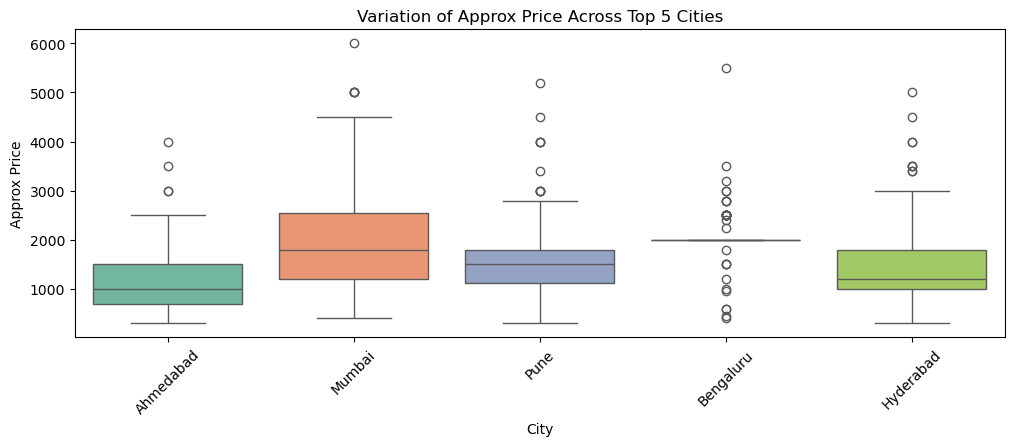

Average Approx Price by Top 10 Cities:
CITY
Bengaluru    2061.111111
Mumbai       2054.407407
Pune         1566.296296
Hyderabad    1487.281481
Ahmedabad    1171.111111
Name: APPROX_PRICE, dtype: float64


In [23]:
top_cities = df["CITY"].value_counts().head(10).index
city_price = df[df["CITY"].isin(top_cities)]

plt.figure(figsize=(12,4))
sns.boxplot(data=city_price, x="CITY", y="APPROX_PRICE", palette="Set2")
plt.title("Variation of Approx Price Across Top 5 Cities")
plt.xlabel("City")
plt.ylabel("Approx Price")
plt.xticks(rotation=45)
plt.savefig("Approx Price Across Top 5 Cities.png",dpi = 400, bbox_inches = "tight")
plt.show()

mean_prices = city_price.groupby("CITY")["APPROX_PRICE"].mean().sort_values(ascending=False)
print("Average Approx Price by Top 10 Cities:")
print(mean_prices)

#### Observations-
- Smaller cities have lower prices, showing more budget-friendly dining options.
- Outliers (very expensive restaurants) appear more often in bigger cities.

### 4) Do Discounts Vary By City

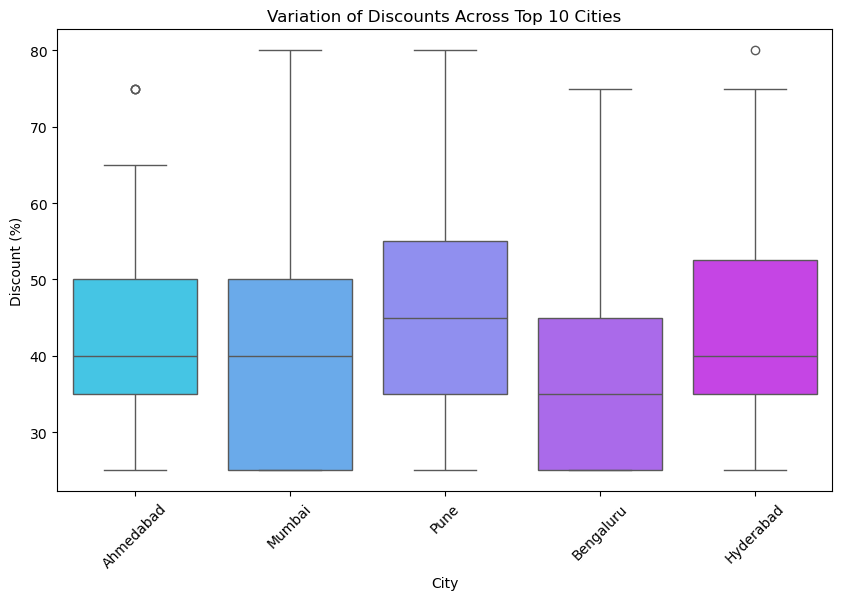

In [24]:
top_cities = df["CITY"].value_counts().head(10).index
city_discounts = df[df["CITY"].isin(top_cities)]

plt.figure(figsize=(10,6))
sns.boxplot(data=city_discounts, x="CITY", y="DISCOUNTS", palette="cool")
plt.title("Variation of Discounts Across Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Discount (%)")
plt.savefig("Variation of Discounts Across Top 10 Cities.png",dpi = 400, bbox_inches = "tight")
plt.xticks(rotation=45)
plt.show()

#### Observations-
- Discounts vary significantly across cities.
- Pune and Hyderabad stand out with higher variability in discounts, while Bengaluru is more consistent but lower.
- Outliers indicate that in all cities, some restaurants give very high promotional discounts (up to 80%)

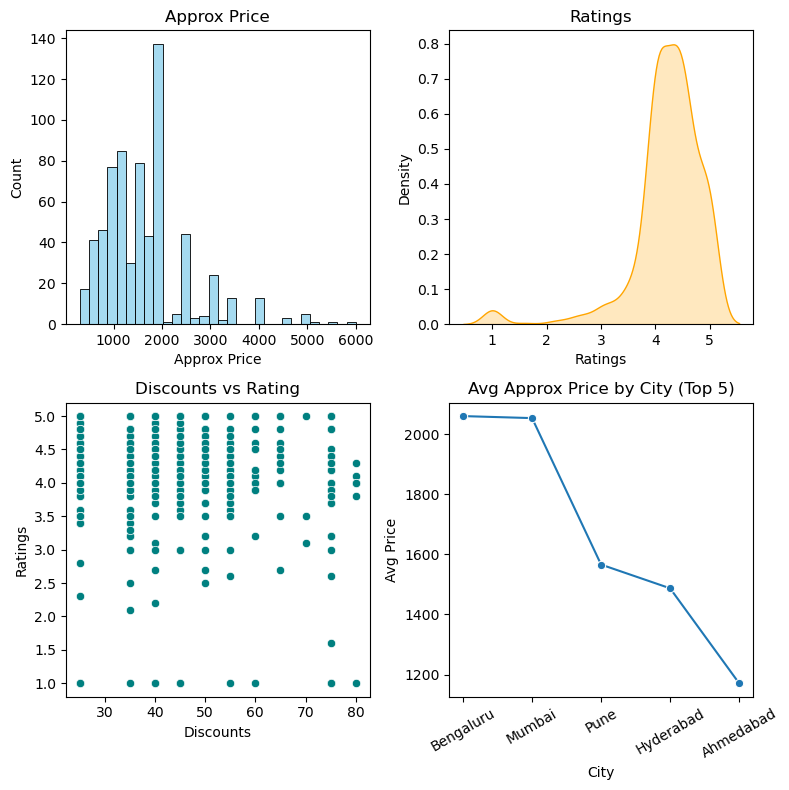

In [25]:
plt.figure(figsize=(8,8))

# Histogram: Approx Price
plt.subplot(2,2,1)
sns.histplot(df["APPROX_PRICE"], bins=30, color="skyblue")
plt.title("Approx Price")
plt.xlabel("Approx Price")
plt.ylabel("Count")

# KDE Plot: Rating
plt.subplot(2,2,2)
sns.kdeplot(df["RATING"], fill=True, color="orange")
plt.title("Ratings")
plt.xlabel("Ratings")
plt.ylabel("Density")

# Scatterplot: Discounts vs Rating
plt.subplot(2,2,3)
sns.scatterplot(x="DISCOUNTS", y="RATING", data=df, color="teal")
plt.title("Discounts vs Rating")
plt.xlabel("Discounts")
plt.ylabel("Ratings")

# Line Plot: Avg Price by City (Top 5)
plt.subplot(2,2,4)
avg_price = df.groupby("CITY")["APPROX_PRICE"].mean().sort_values(ascending=False).head(5)
sns.lineplot(x=avg_price.index, y=avg_price.values, marker="o")
plt.title("Avg Approx Price by City (Top 5)")
plt.xlabel("City")
plt.ylabel("Avg Price")
plt.xticks(rotation=30)

plt.savefig("Subplots.png",dpi = 400, bbox_inches = "tight")
plt.tight_layout()
plt.show()

### Observations-
Histogram: Approx Price
- Most restaurants have prices concentrated in the lower to mid-range.
- Very few restaurants are extremely expensive (long right tail).

️KDE Plot: Ratings
- Ratings are skewed towards higher values (many restaurants rated 4.0–5.0).
- Very few restaurants have poor ratings (<3).

️Scatterplot: Discounts vs Rating
- No strong linear relationship between discounts and ratings.
- Some highly rated restaurants offer low or no discounts.

️Line Plot: Avg Approx Price by City (Top 5)
- Smaller cities are relatively cheaper.
- Suggests that location strongly influences pricing strategy.

## 6) Top 5 Cheapest Restaurants in Each City

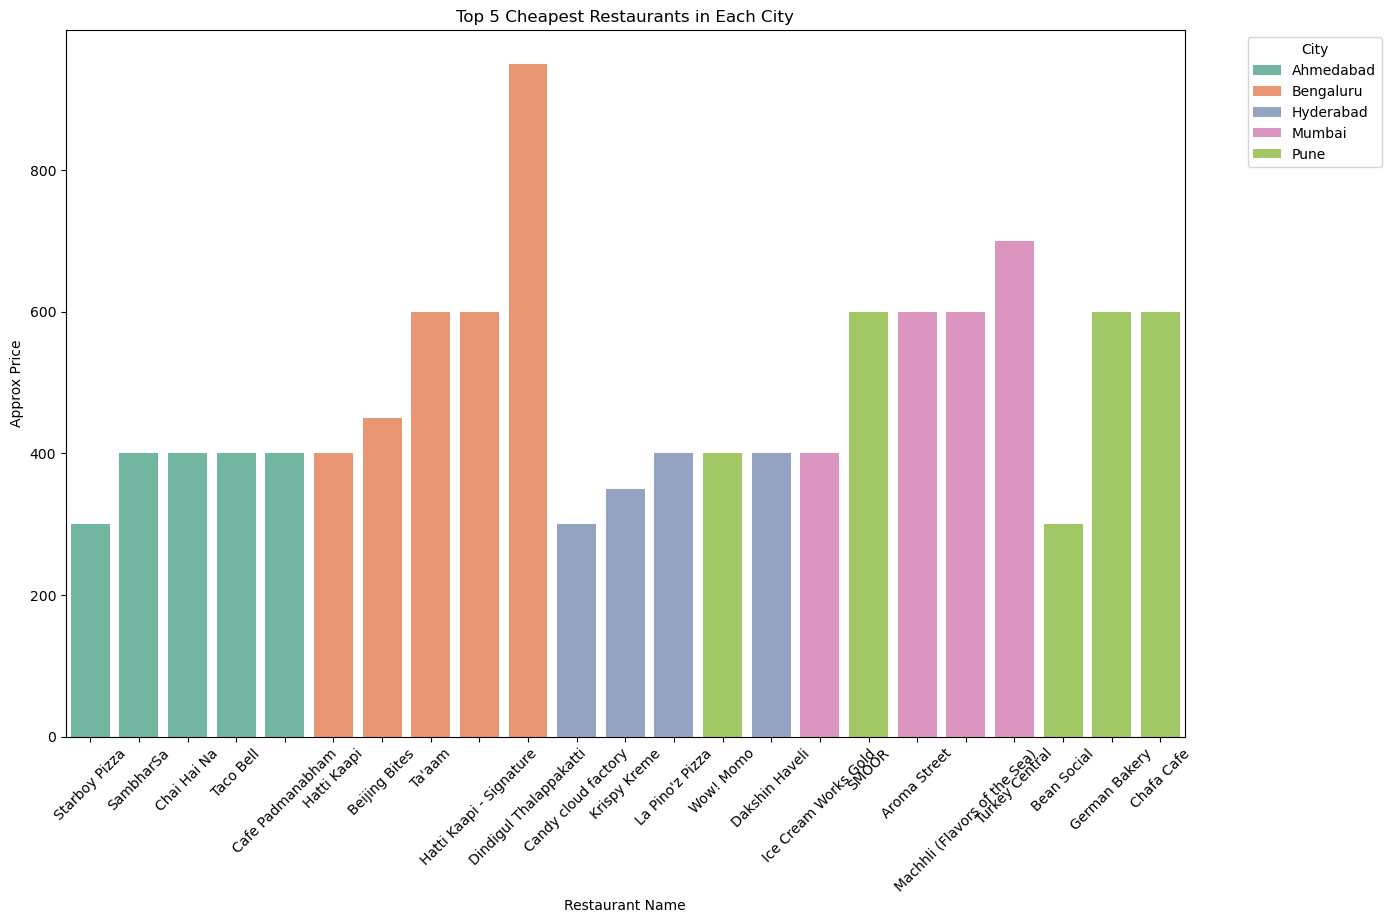

In [26]:
top_cheapest = df.sort_values(["CITY", "APPROX_PRICE"], ascending=[True, True]) \
                 .groupby("CITY").head(5)

plt.figure(figsize=(14,8))
sns.barplot(data=top_cheapest, x="NAME", y="APPROX_PRICE", hue="CITY", dodge=False, palette="Set2")
plt.title("Top 5 Cheapest Restaurants in Each City")
plt.xlabel("Restaurant Name")
plt.ylabel("Approx Price")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### 7) Top 5 Most Expensive Restaurants in Each City

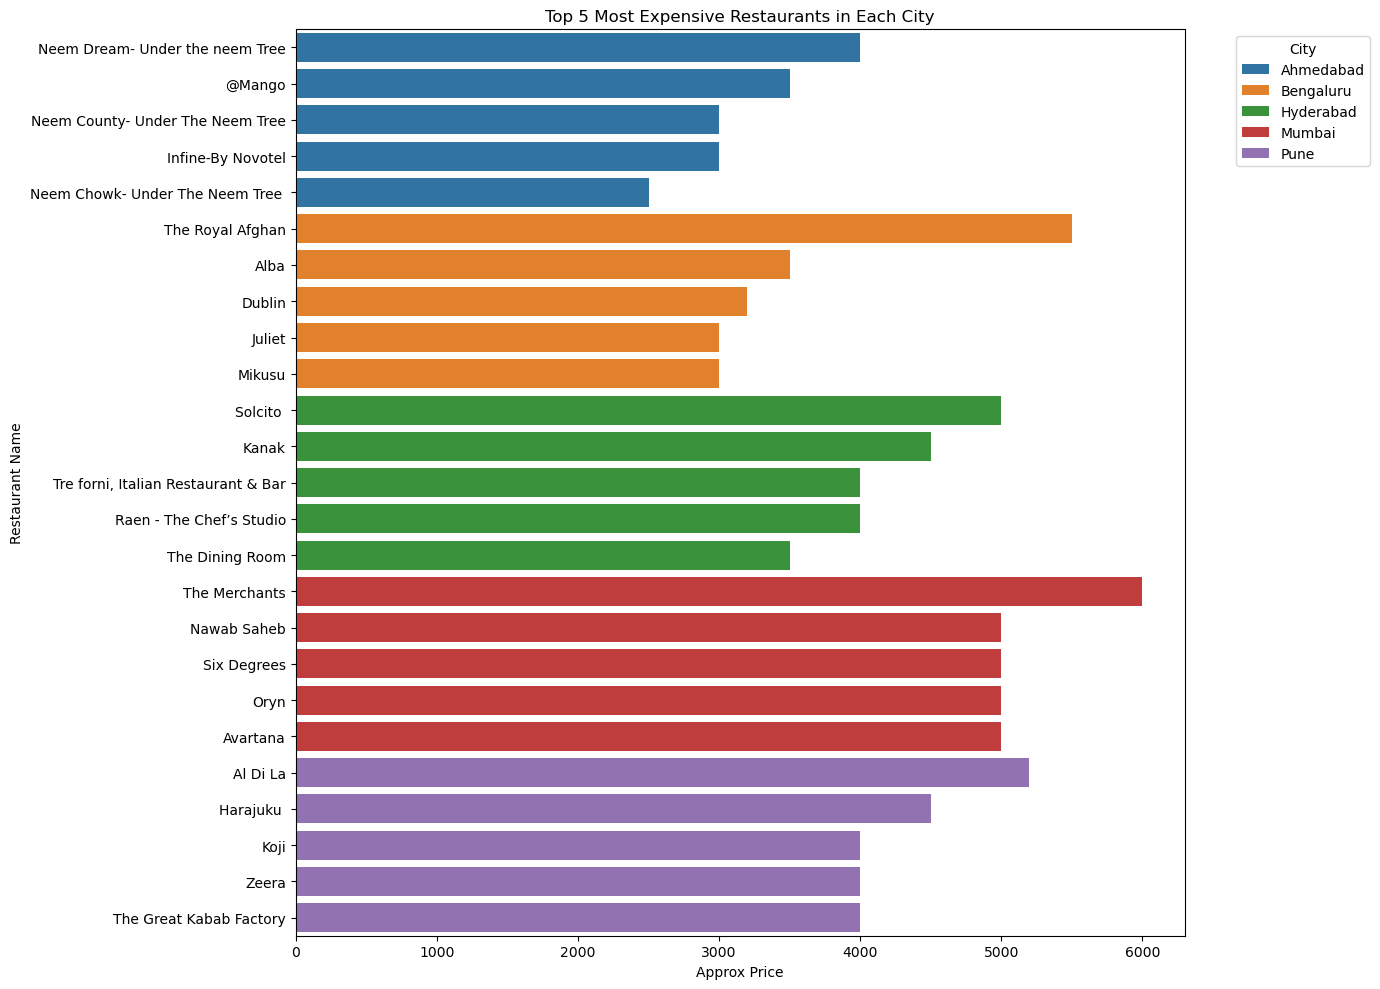

In [27]:
top_expensive = df.sort_values(["CITY", "APPROX_PRICE"], ascending=[True, False]) \
                  .groupby("CITY").head()

plt.figure(figsize=(14, 10))
sns.barplot(data=top_expensive, x="APPROX_PRICE", y="NAME", hue="CITY", dodge=False)
plt.title("Top 5 Most Expensive Restaurants in Each City")
plt.xlabel("Approx Price")
plt.ylabel("Restaurant Name")
plt.legend(title="City", bbox_to_anchor=(1.05,1), loc="upper left")
plt.savefig("Top 5 Most Expensive Restaurants in Each City.png",dpi = 400, bbox_inches = "tight")
plt.tight_layout()
plt.show()

### Multivariate Analysis

### 1) What is The Joint Relationship Between Price, Discount, and Rating

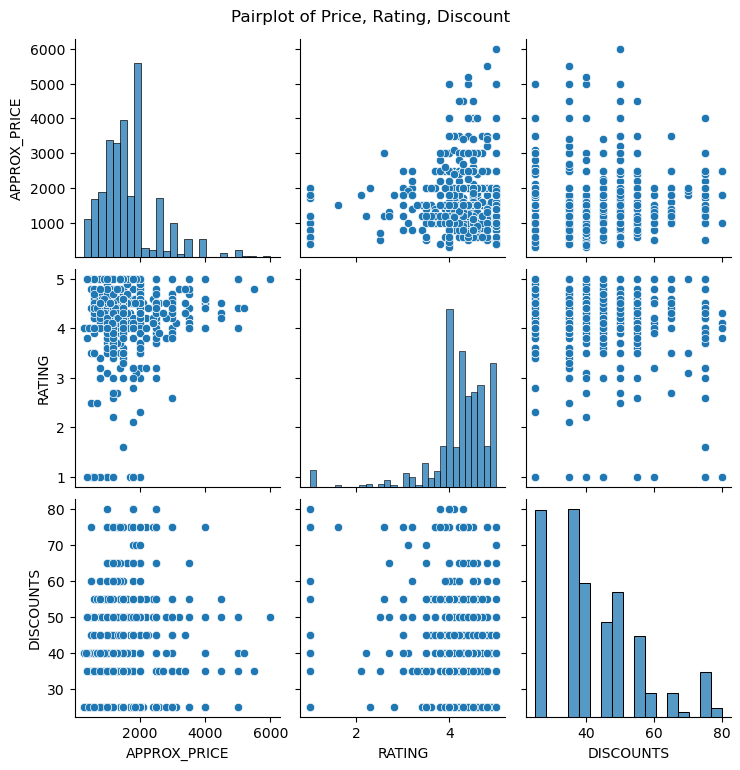

In [28]:
sns.pairplot(df[['APPROX_PRICE','RATING','DISCOUNTS']])
plt.suptitle("Pairplot of Price, Rating, Discount", y=1.02)
plt.savefig("Pairplot of Price, Rating, Discount.png",dpi = 400, bbox_inches = "tight")
plt.show()

#### Observations-
- Restaurants offering both high discounts and high ratings are rare → quality may trump discounts.
- Most products have lower prices, higher ratings, and moderate discounts.
- There is little to no correlation between price, rating, and discount; each seems independent.
- Discounts do not guarantee better ratings or favor any price level

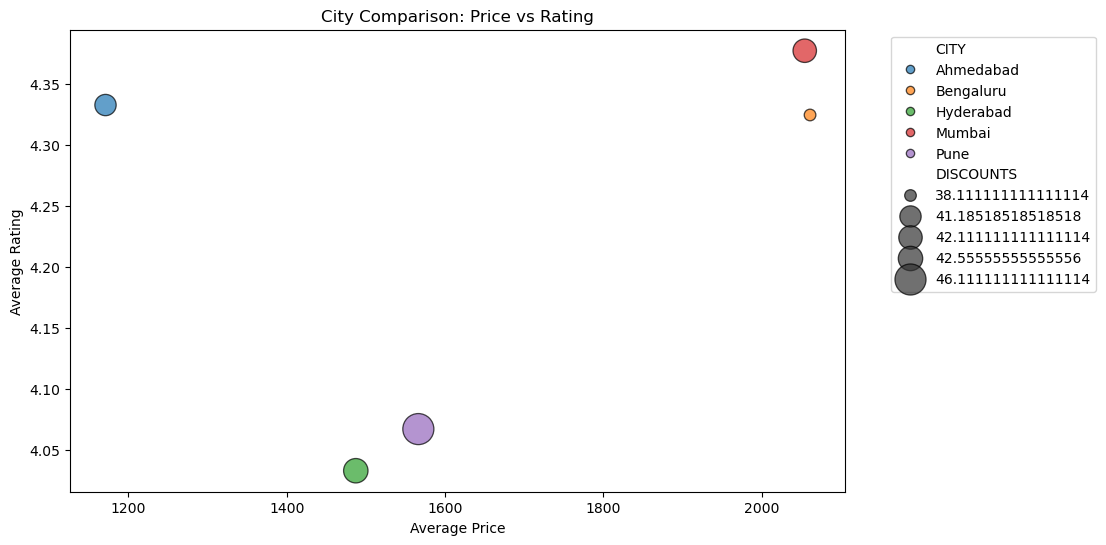

In [29]:
# Group by city and calculate average price, discount, and rating
city_summary = df.groupby("CITY").agg({"APPROX_PRICE": "mean","DISCOUNTS": "mean","RATING": "mean"}).reset_index()

# Take top 10 cities with most restaurants for fairness
top_cities = df["CITY"].value_counts().head(10).index
city_summary = city_summary[city_summary["CITY"].isin(top_cities)]

# Scatterplot: Price vs Rating, bubble size = Discounts
plt.figure(figsize=(10,6))
sns.scatterplot(data=city_summary,x="APPROX_PRICE", y="RATING", size="DISCOUNTS", hue="CITY", palette="tab10", sizes=(70,500), alpha=0.7,edgecolor="black")
plt.title("City Comparison: Price vs Rating")
plt.xlabel("Average Price")
plt.ylabel("Average Rating")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Observation-
- Cities in the top-right of the scatterplot have higher prices & higher ratings → premium dining experience.
- Cities in the middle with medium prices, good ratings, and medium bubbles (discounts) → best balance for customers.
- Large bubbles (bigger discounts) show cities where restaurants compete harder with offers.
- A city that has reasonable prices, good ratings, and noticeable discounts is considered the best balance

C:\Users\Venkatesh\AppData\Local\Temp\ipykernel_7008\3763215899.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


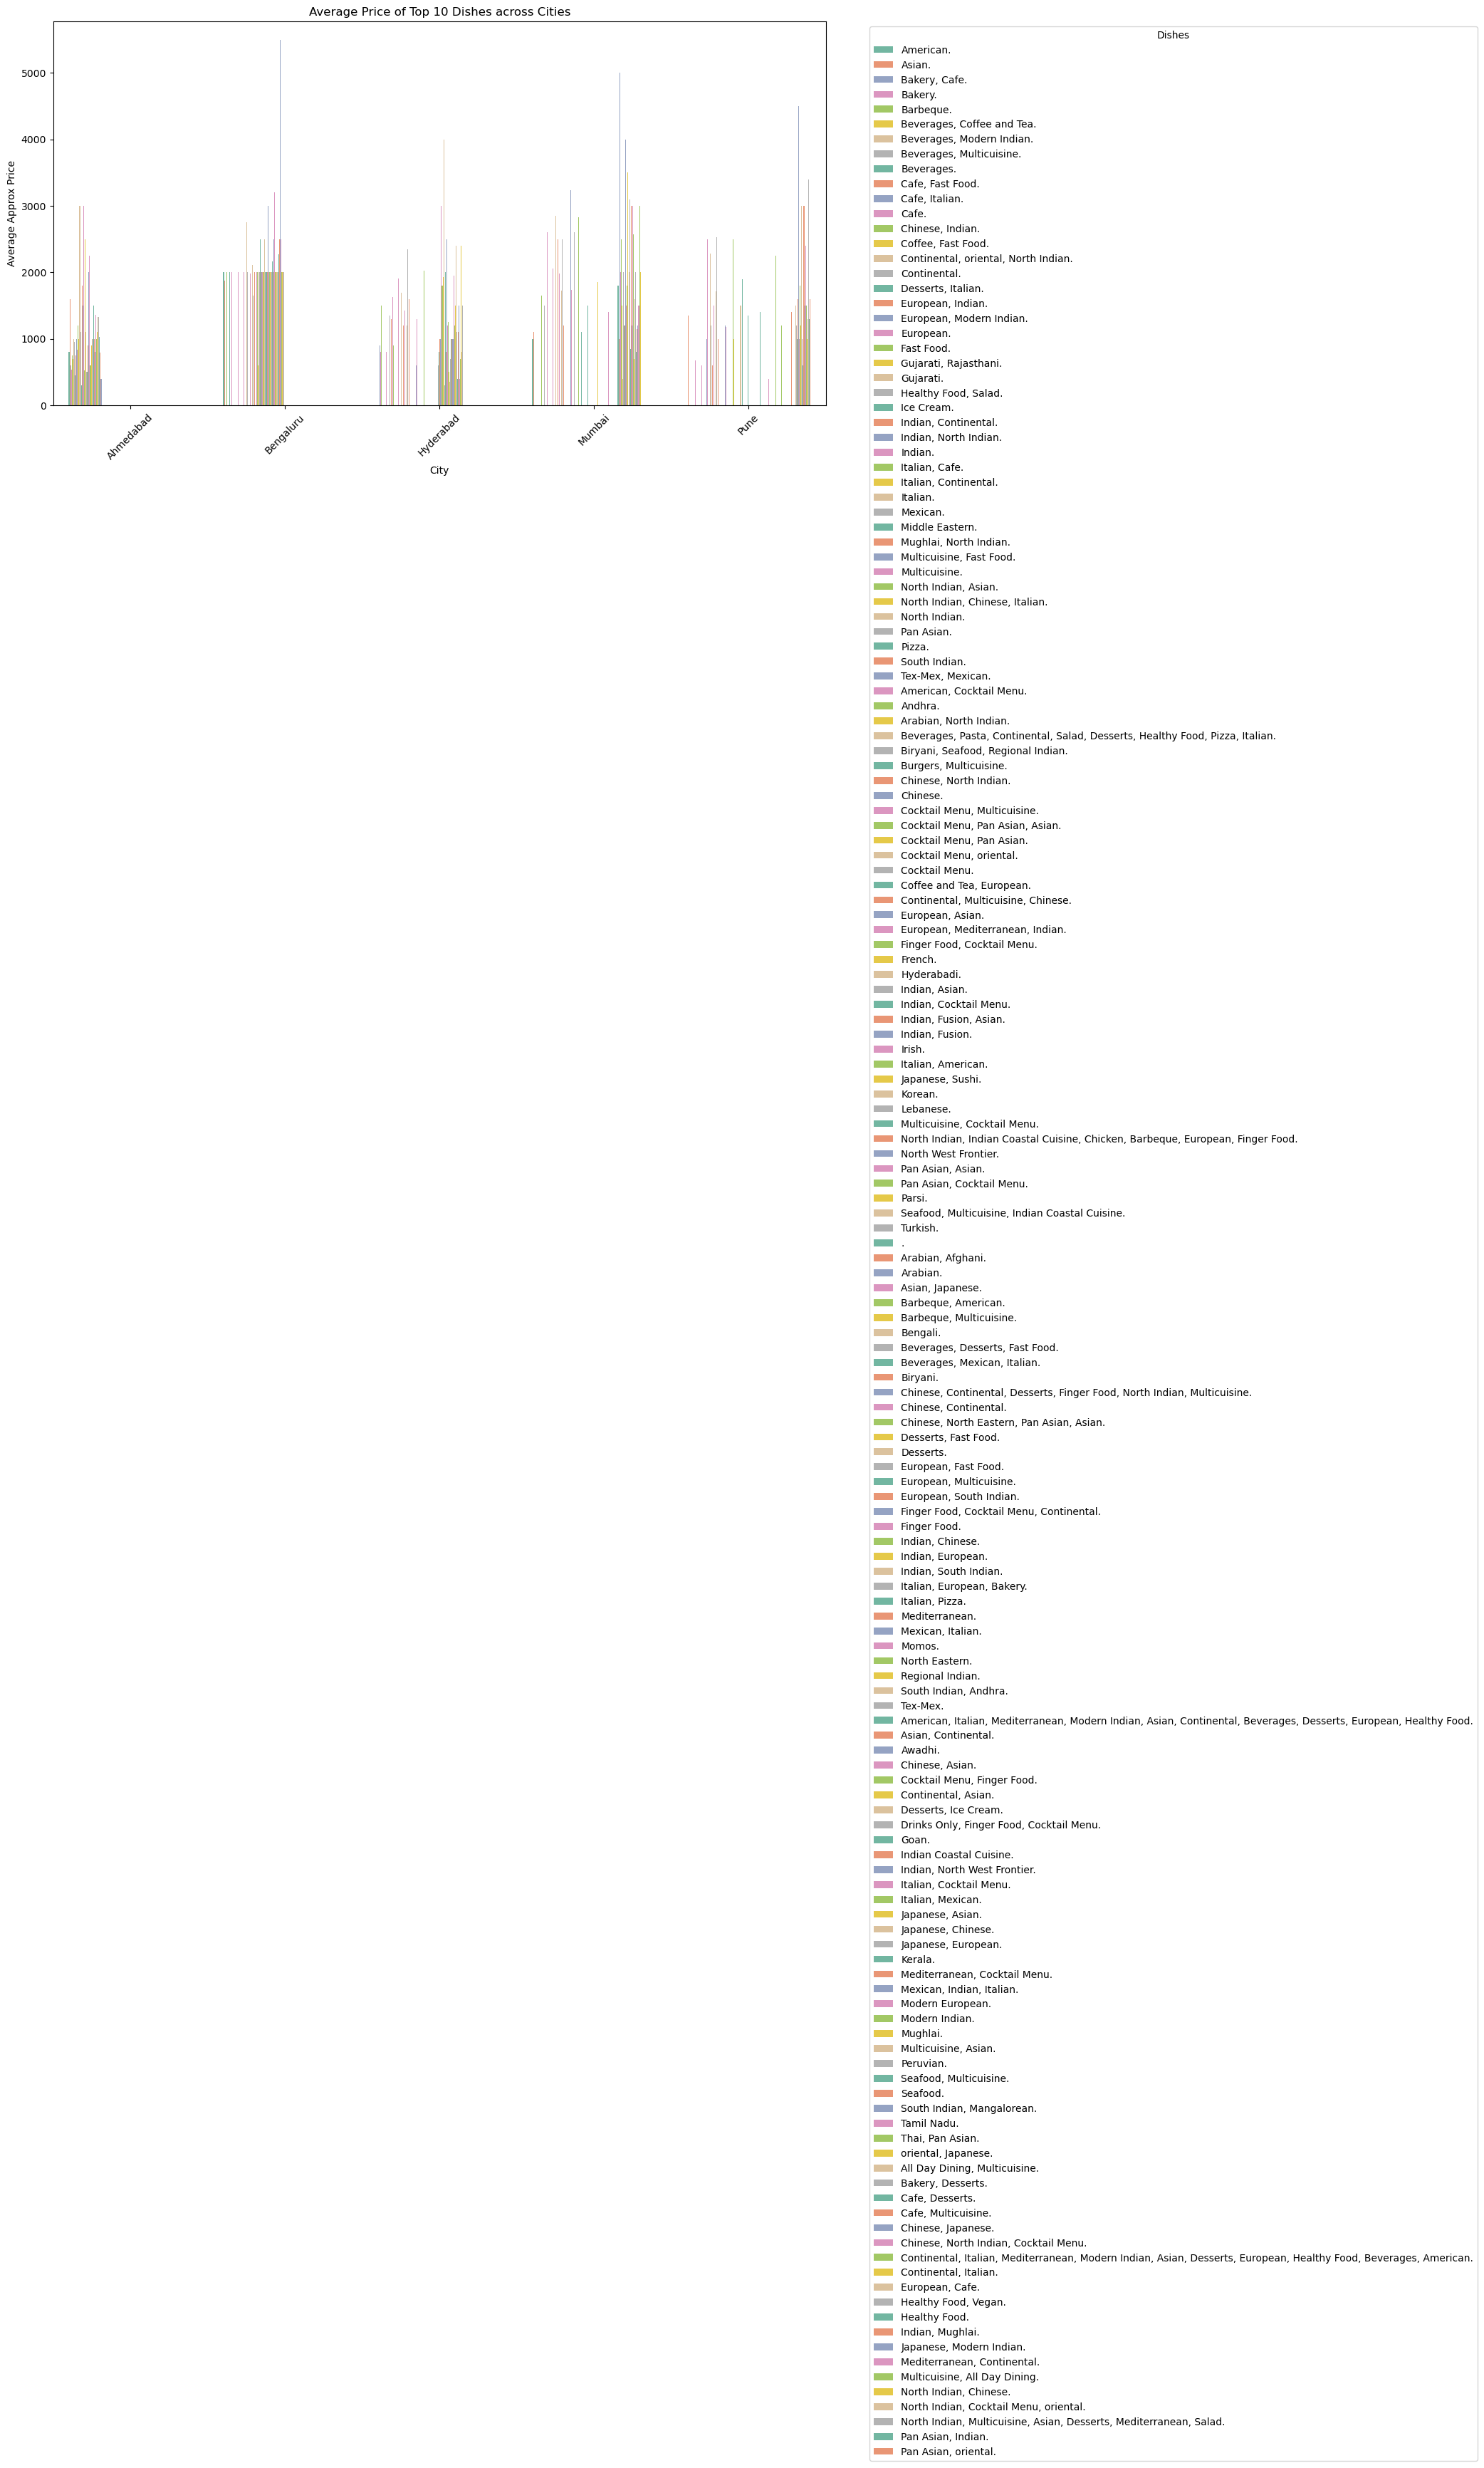

In [30]:
# Group by City & Cuisine (DISHES), take average price
city_cuisine_price = df.groupby(["CITY", "DISHES"])["APPROX_PRICE"].mean().reset_index()

plt.figure(figsize=(14,7))
sns.barplot(data=city_cuisine_price, x="CITY", y="APPROX_PRICE", hue="DISHES", palette="Set2")

plt.title("Average Price of Top 10 Dishes across Cities")
plt.xlabel("City")
plt.ylabel("Average Approx Price")
plt.legend(title="Dishes", bbox_to_anchor=(1.05,1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()